In [61]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

In [62]:
library_df = pd.read_csv(r'D:/library_files/library_files/human_lib.tsv', sep='\t')

peptidelist=['QQVPSGESAILDR','DYLEHITSIGPR','WLAPDGLIFPDR','LTFDSSFSPNTGK','TVMENFVAFVDK','DRIEITSLLPSR','DNNGVIGLLEPMK',
 'TEEQGIPRPLHPPPPPPVQPPQHPR','YTAESSDTLCPR','PNLADLAVYGVLR', 'TAPGMGDQSGCYR','SVDPDSPAEASGLR','LLTIGDANGEIQR','SAIDLTPIVVEDK','EQSILELGSLLAK',
 'AFFPCFDTPAVK','NGQYAEASALYGR','LSDLDYMQFIR','NIEELQQQNQR','YGGDEIPFSPYR','MWEVQTGYCVK','FNEVAAQYSEDK','SIMTIVGHTDVVK','IAAEIAQAEEQAR',
 'YGGDEIPYSPFR','YCFPNYVGRPK','LVQTAAQQVAEDK','SIDMSWDSVTMK','LLPLVSDEVFIR','VWLEVEPVGMLK','EFCENLSADCR','LLECHFMPPEK','VDIDAPDVEVHDPDWHLK',
 'SLVWGAEAVQALR','LGYEEHIPGQTR','KEEQVIQVWNK']
print(len(peptidelist))


36


In [63]:
pep_library=library_df.loc[(library_df['PeptideSequence'].isin(peptidelist)) & (library_df['PrecursorMz'] <701) & (library_df['PrecursorMz'] >700)]

In [64]:
pep_library

,PrecursorMz,ProductMz,Tr_recalibrated,transition_name,CE,LibraryIntensity,transition_group_id,decoy,PeptideSequence,ProteinName,Annotation,FullUniModPeptideName,PrecursorCharge,PeptideGroupLabel,UniprotID,FragmentType,FragmentCharge,FragmentSeriesNumber,LabelType
1691001,700.339381,517.752410,2430.9,1692287_y9_2_AFFPC(UniMod:4)FDTPAVK_2,-1,10000.0,155471_AFFPC(UniMod:4)FDTPAVK_2,0,AFFPCFDTPAVK,1/sp|Q9H4A4|AMPB_HUMAN,y9^2/-0.018,AFFPC(UniMod:4)FDTPAVK,2,155471_AFFPC(UniMod:4)FDTPAVK_2,1/sp|Q9H4A4|AMPB_HUMAN,y,2,9,light
1691002,700.339381,1034.497543,2430.9,1692292_y9_1_AFFPC(UniMod:4)FDTPAVK_2,-1,9563.0,155471_AFFPC(UniMod:4)FDTPAVK_2,0,AFFPCFDTPAVK,1/sp|Q9H4A4|AMPB_HUMAN,y9/0.013,AFFPC(UniMod:4)FDTPAVK,2,155471_AFFPC(UniMod:4)FDTPAVK_2,1/sp|Q9H4A4|AMPB_HUMAN,y,1,9,light
1691003,700.339381,414.271096,2430.9,1692283_y4_1_AFFPC(UniMod:4)FDTPAVK_2,-1,4299.4,155471_AFFPC(UniMod:4)FDTPAVK_2,0,AFFPCFDTPAVK,1/sp|Q9H4A4|AMPB_HUMAN,y4/-0.047,AFFPC(UniMod:4)FDTPAVK,2,155471_AFFPC(UniMod:4)FDTPAVK_2,1/sp|Q9H4A4|AMPB_HUMAN,y,1,4,light
1691004,700.339381,937.444779,2430.9,1692291_y8_1_AFFPC(UniMod:4)FDTPAVK_2,-1,3472.8,155471_AFFPC(UniMod:4)FDTPAVK_2,0,AFFPCFDTPAVK,1/sp|Q9H4A4|AMPB_HUMAN,y8/-0.034,AFFPC(UniMod:4)FDTPAVK,2,155471_AFFPC(UniMod:4)FDTPAVK_2,1/sp|Q9H4A4|AMPB_HUMAN,y,1,8,light
1691005,700.339381,777.414131,2430.9,1692290_y7_1_AFFPC(UniMod:4)FDTPAVK_2,-1,3215.5,155471_AFFPC(UniMod:4)FDTPAVK_2,0,AFFPCFDTPAVK,1/sp|Q9H4A4|AMPB_HUMAN,y7/-0.074,AFFPC(UniMod:4)FDTPAVK,2,155471_AFFPC(UniMod:4)FDTPAVK_2,1/sp|Q9H4A4|AMPB_HUMAN,y,1,7,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697028,700.311548,465.197990,1228.8,1698307_b4_1_YTAESSDTLC(UniMod:4)PR_2,-1,877.1,155969_YTAESSDTLC(UniMod:4)PR_2,0,YTAESSDTLCPR,1/sp|Q9NSE4|SYIM_HUMAN,b4/-0.084,YTAESSDTLC(UniMod:4)PR,2,155969_YTAESSDTLC(UniMod:4)PR_2,1/sp|Q9NSE4|SYIM_HUMAN,b,1,4,light
1697029,700.311548,552.230019,1228.8,1698311_b5_1_YTAESSDTLC(UniMod:4)PR_2,-1,315.8,155969_YTAESSDTLC(UniMod:4)PR_2,0,YTAESSDTLCPR,1/sp|Q9NSE4|SYIM_HUMAN,b5/-0.066,YTAESSDTLC(UniMod:4)PR,2,155969_YTAESSDTLC(UniMod:4)PR_2,1/sp|Q9NSE4|SYIM_HUMAN,b,1,5,light
1697030,700.311548,468.216192,1228.8,1698308_y8_2_YTAESSDTLC(UniMod:4)PR_2,-1,226.3,155969_YTAESSDTLC(UniMod:4)PR_2,0,YTAESSDTLCPR,1/sp|Q9NSE4|SYIM_HUMAN,"y8^2/-0.095,b9-35^2/0.925",YTAESSDTLC(UniMod:4)PR,2,155969_YTAESSDTLC(UniMod:4)PR_2,1/sp|Q9NSE4|SYIM_HUMAN,y,2,8,light
1697031,700.311548,532.737488,1228.8,1698309_y9_2_YTAESSDTLC(UniMod:4)PR_2,-1,179.7,155969_YTAESSDTLC(UniMod:4)PR_2,0,YTAESSDTLCPR,1/sp|Q9NSE4|SYIM_HUMAN,y9^2/0.146,YTAESSDTLC(UniMod:4)PR,2,155969_YTAESSDTLC(UniMod:4)PR_2,1/sp|Q9NSE4|SYIM_HUMAN,y,2,9,light


In [66]:
pep_library.to_csv(r'C:\Users\jymbc\Desktop\pep_li.csv')

In [5]:
pep00=pep_library[pep_library['PeptideSequence'].str.match(peptidelist[0])]
peptop=pep00.sort_values(by='LibraryIntensity',ascending=False)
peptop
peptop10=peptop.iloc[:10]
peptop10

,PrecursorMz,ProductMz,Tr_recalibrated,transition_name,CE,LibraryIntensity,transition_group_id,decoy,PeptideSequence,ProteinName,Annotation,FullUniModPeptideName,PrecursorCharge,PeptideGroupLabel,UniprotID,FragmentType,FragmentCharge,FragmentSeriesNumber,LabelType
1695061,700.36243,1044.532015,1583.4,1696356_y10_1_QQVPSGESAILDR_2,-1,10000.0,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y10/0.014,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,10,light
1695062,700.36243,522.769646,1583.4,1696349_y10_2_QQVPSGESAILDR_2,-1,2162.2,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,"y10^2/-0.023,b5-17/-0.505,b5-18/0.479",QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,2,10,light
1695063,700.36243,1143.600428,1583.4,1696357_y11_1_QQVPSGESAILDR_2,-1,1494.6,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y11/0.017,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,11,light
1695064,700.36243,947.479251,1583.4,1696355_y9_1_QQVPSGESAILDR_2,-1,1242.3,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y9/-0.041,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,9,light
1695065,700.36243,860.447222,1583.4,1696354_y8_1_QQVPSGESAILDR_2,-1,931.9,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y8/-0.050,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,8,light
1695066,700.36243,674.383165,1583.4,1696352_y6_1_QQVPSGESAILDR_2,-1,892.3,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y6/-0.071,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,6,light
1695067,700.36243,403.229959,1583.4,1696346_y3_1_QQVPSGESAILDR_2,-1,493.8,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,"y3/-0.019,y7^2/0.994",QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,3,light
1695068,700.36243,587.351137,1583.4,1696351_y5_1_QQVPSGESAILDR_2,-1,281.8,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y5/-0.097,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,5,light
1695069,700.36243,516.314023,1583.4,1696348_y4_1_QQVPSGESAILDR_2,-1,267.2,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y4/-0.055,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,1,4,light
1695070,700.36243,572.303852,1583.4,1696350_y11_2_QQVPSGESAILDR_2,-1,256.9,155813_QQVPSGESAILDR_2,0,QQVPSGESAILDR,1/sp|P09874|PARP1_HUMAN,y11^2/-0.040,QQVPSGESAILDR,2,155813_QQVPSGESAILDR_2,1/sp|P09874|PARP1_HUMAN,y,2,11,light


In [6]:
peplist=[]
intensities=[]
for index in range(0,36):
    pep00=pep_library[pep_library['PeptideSequence'].str.match(peptidelist[index])]
    peptop=pep00.sort_values(by='LibraryIntensity',ascending=False)
    peptop10=peptop.iloc[:10]
    peptides=peptop10['ProductMz'].tolist()
    intensity=peptop10['LibraryIntensity'].tolist()
    peplist.append(peptides)
    intensities.append(intensity)
    
    
    


In [7]:
np.array(intensities[0])/max(intensities[0])

array([1.     , 0.21622, 0.14946, 0.12423, 0.09319, 0.08923, 0.04938,
       0.02818, 0.02672, 0.02569])

In [8]:

peplist[7]

[731.39473318,
 634.341969326,
 859.4533106959998,
 726.8833326009999,
 488.198718678,
 576.8172644109999,
 678.3569506739999,
 409.2306279559999,
 1055.5744884679998,
 537.2892054719998]

In [9]:
intensity=np.array(peptop10['LibraryIntensity'].tolist())/max(peptop10['LibraryIntensity'].tolist())

In [10]:
def getFragInt(pred_mass, mz_list, int_list, tol, tol_type):
  
    if tol_type=="ppm":
        lowmz = pred_mass - pred_mass*tol
        highmz = pred_mass + pred_mass*tol
    if tol_type == "abs":
        lowmz = pred_mass - tol
        highmz = pred_mass + tol
    found = [int_list[index] for index, value in enumerate(mz_list) if value>lowmz and value<highmz]
    #found = found-noiselevel
    if len(found)==0:
        found = [1]
    return(found[0])

In [11]:
fileslist = []
dir = 'D:\\yuming\\20220304\\quantification240k\\mzml'
for file in os.listdir(dir):
    if file.endswith(".mzML"):
        fileslist.append(os.path.join(dir, file))
print(fileslist)

['D:\\yuming\\20220304\\quantification240k\\mzml\\hela1ug240k.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela1ug240k2.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela1ug240k3.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela05ug240k.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela05ug240k2.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela05ug240k3.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela025ug240k.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela025ug240k2.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela025ug240k3.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela0125ug240k.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela0125ug240k_20220305180559.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela0125ug240k2.mzML', 'D:\\yuming\\20220304\\quantification240k\\mzml\\hela0125ug240k3.mzML']


In [12]:
tmp_1ug= pyteomics.mzml.read(fileslist[0], use_index=True)

In [49]:
tmp_1ug.get_by_index(301)

{'index': 301,
 'id': 'controllerType=0 controllerNumber=1 scan=302',
 'defaultArrayLength': 3231,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 145.05908203125 m/z,
       'scan window upper limit': 1450.5908203125 m/z}]},
    'scan start time': 2.180623403645 minute,
    'filter string': 'FTMS + c NSI cv=-40.00 Full ms2 700.7700@hcd30.00 [145.0591-1450.5908]',
    'preset scan configuration': 134.0,
    'ion injection time': 503.000020980835 millisecond,
    '[Thermo Trailer Extra]Monoisotopic M/Z:': 0.0}],
  'no combination': ''},
 'precursorList': {'count': 1,
  'precursor': [{'isolationWindow': {'isolation window target m/z': 700.77001953125 m/z,
     'isolation window lower offset': 0.5 m/z,
     'isolation window upper offset': 0.5 m/z,
     'ms level': 1},
    'selectedIonList': {'count': 1,
     'selectedIon': [{'selected ion m/z': 700.77001953125 m/z}]},
    'activation': {'beam-type collision-induced diss

In [13]:
x=tmp_1ug.get_by_index(301)['m/z array']
y=tmp_1ug.get_by_index(301)['intensity array']
x_final=x.tolist()
y_final=y.tolist()

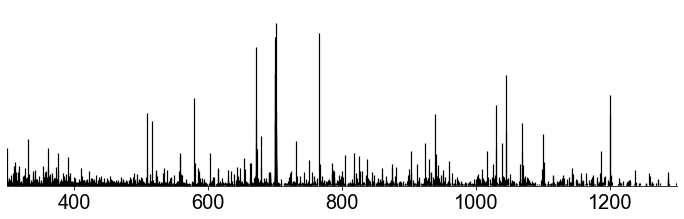

In [14]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize']=(12,3.3)

ax = plt.subplot()
TK = plt.gca() #获取边框

TK.spines['right'].set_visible(False)
TK.spines['top'].set_visible(False)
TK.spines['left'].set_visible(False)

plt.vlines(x_final,[0],y_final,linewidth=1.2,linestyles ="solid", colors ="k")
#plt.vlines(list_by,[0]*len(list_by),k,linewidth=1,linestyles ="solid", colors ="red")
#plt.vlines(list_by2,[0]*len(list_by2),kkk.tolist(),linewidth=1,linestyles ="solid", colors ="k")
#plt.vlines(list_by2,[0]*len(list_by2),k2,linewidth=1,linestyles ="solid", colors ="b")
#plt.vlines(list_by3,[0]*len(list_by3),k3,linewidth=1,linestyles ="solid", colors ="purple")
#plt.xlabel('m/z',fontsize=25)
#plt.ylabel('Intensity',fontsize=25)
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlim(300,1300)
#plt.xticks(np.arange(0, 24, 4))
#plt.yticks(np.arange(0, 350000, 100000))
plt.ylim(-50, 2.5e4)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#plt.figure(figsize=(11,4))
# vlines(x, ymin, ymax, colors, linestyles)

ax.set_yticks([])
plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\figures\\SCAN302.tiff', dpi=600) 
plt.show() 

In [15]:
TOL_TYPE = "ppm"
TOL = 30e-6
pred_mass=860.447222
mz_list=tmp_1ug.get_by_index(301)['m/z array']
int_list=tmp_1ug.get_by_index(301)['intensity array']
getFragInt(pred_mass, mz_list, int_list, TOL, TOL_TYPE )

1555.82568359375

In [16]:
def intenlist(i=0):
    list_by=peplist[i]
    intensity=[]
    for x in list_by:
        intensity.append(getFragInt(x, mz_list, int_list, TOL, TOL_TYPE))
    kk=np.array(intensity)/max(intensity)
    y=kk.tolist()
    return(y,list_by)

In [17]:
intenlist(i=0)

([1.0,
  0.112899639349855,
  0.15489075597936008,
  0.09833261180459098,
  0.10110067718359854,
  0.018489905784337915,
  0.03291771818216894,
  0.021353292519047853,
  0.0355936133410601,
  0.01593501205054534],
 [1044.5320145059998,
  522.7696455029999,
  1143.6004284239998,
  947.4792506519998,
  860.447222242,
  674.3831654219998,
  403.22995924,
  587.351137012,
  516.314023222,
  572.3038524619999])

In [18]:

def Convert(numbers):
    return [ -i for i in numbers ]
  


In [19]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = "Arial"

In [20]:
def plot_fscan(number=0):
    plt.rcParams['figure.figsize']=(6.8,5)
    plt.rcParams["legend.loc"] = 'upper left'
    ax = plt.subplot()
    TK = plt.gca() #获取边框
    TK.spines['right'].set_visible(False)
    TK.spines['top'].set_visible(False)  
    TK.spines['left'].set_visible(True)
    k=np.array(np.array(intensities[number])/max(intensities[number]))
    plt.vlines(intenlist(i=number)[1],[0]*len(intenlist(i=number)[1]),intenlist(i=number)[0],linewidth=2,linestyles ="solid", colors ="purple",label='projected spectrum')
    plt.vlines(peplist[number],[0]*len(peplist[number]),Convert(k.tolist()),linewidth=2,linestyles ="solid", colors ="dodgerblue",label='library spectrum')
    plt.hlines(0, 300, 1300, colors="black", linestyles='solid',linewidth=0.5)
    #plt.xlabel('m/z',fontsize=25)
    #plt.ylabel('Intensity',fontsize=25)
    plt.legend(fontsize=12)
    plt.title(str(peptidelist[number]),fontsize=20)
    plt.xticks(fontsize=18)
    plt.xticks(np.arange(300, 1300, 200))
    plt.xlim(300,1300)
    plt.ylim(-1.1, 1.1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #ax.invert_yaxis()
    ax.set_yticks([])
    #ax.set_xticks([])
    
    flag = 'x=%s' % str(peptidelist[number]) 
    plt.savefig("%s.png" % flag,dpi=1000)
    
    #plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\figures\\"%s.png" % flag', dpi=600) 
    plt.show() 

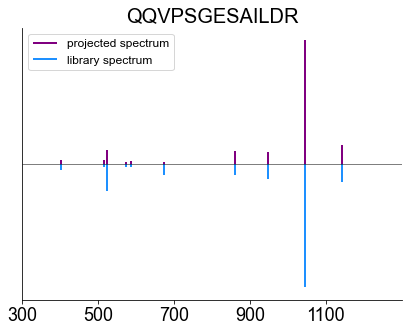

In [21]:
plot_fscan(number=0)

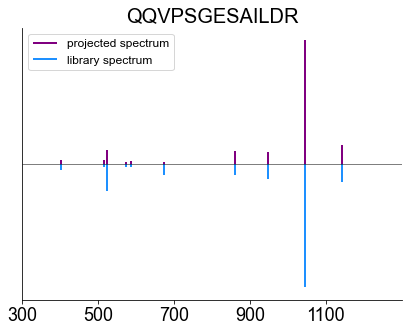

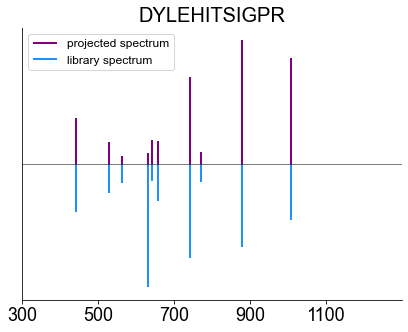

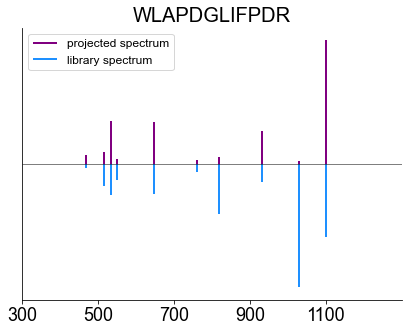

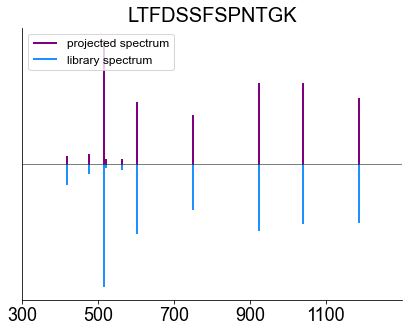

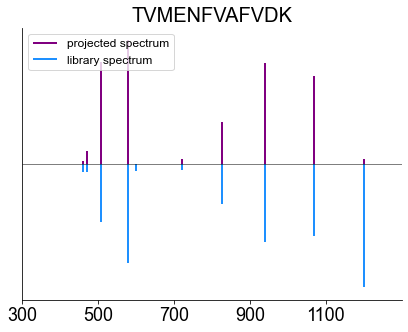

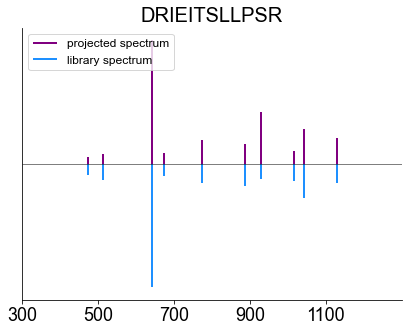

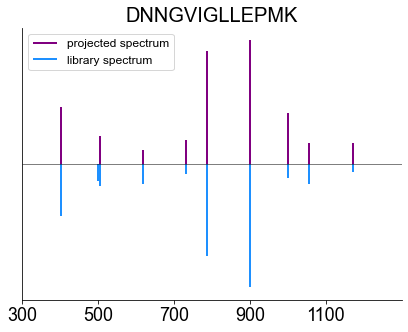

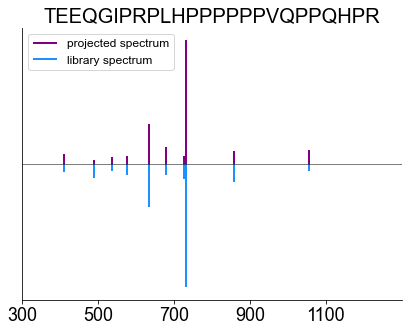

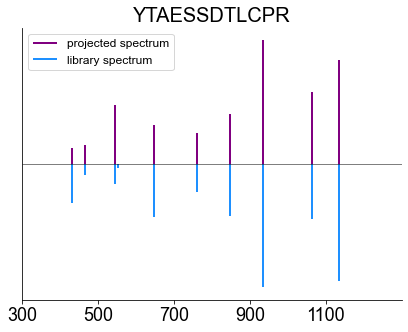

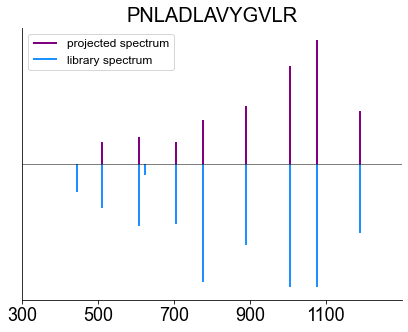

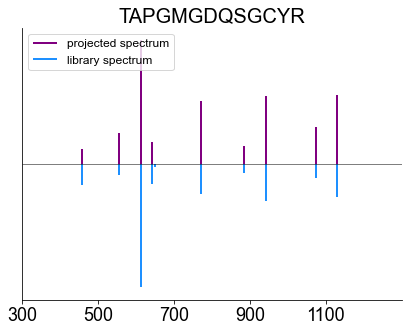

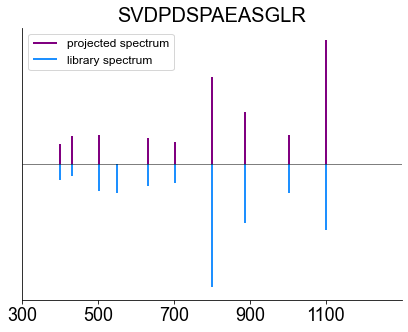

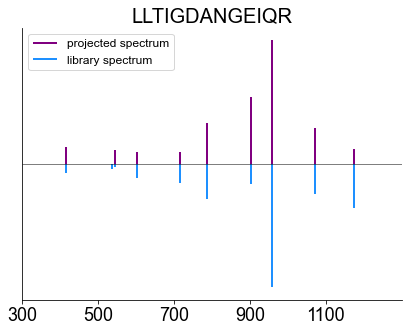

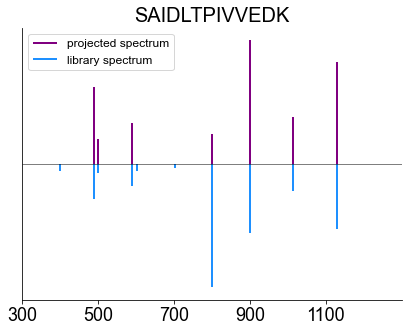

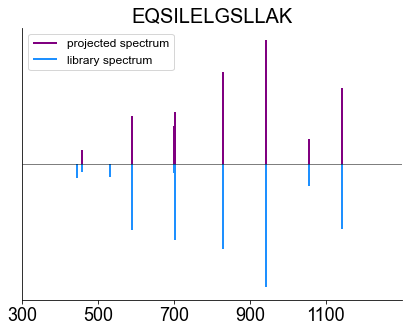

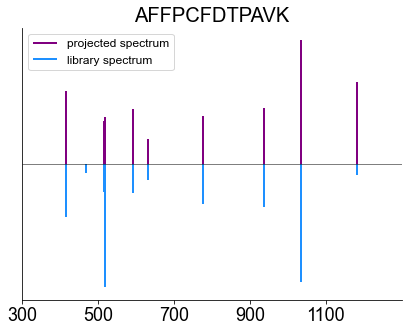

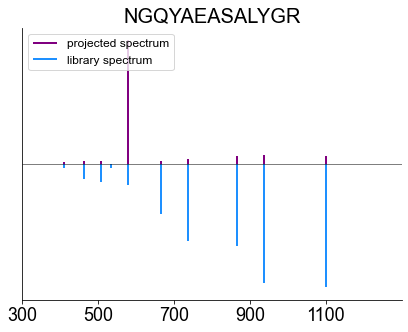

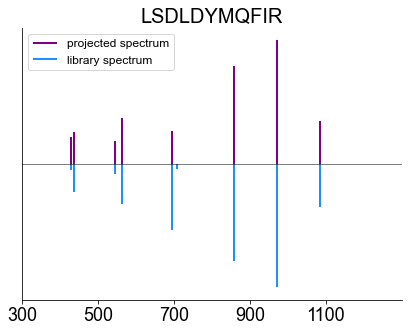

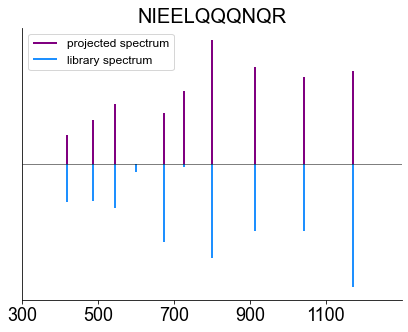

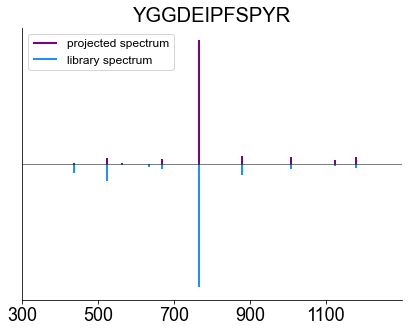

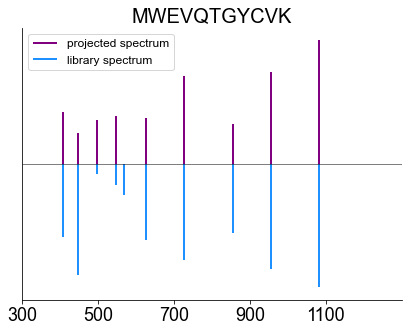

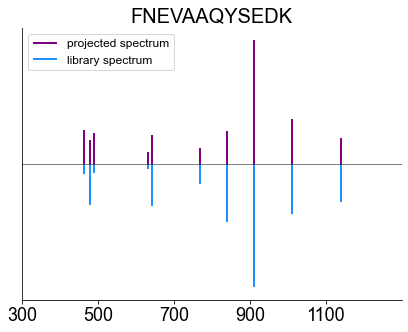

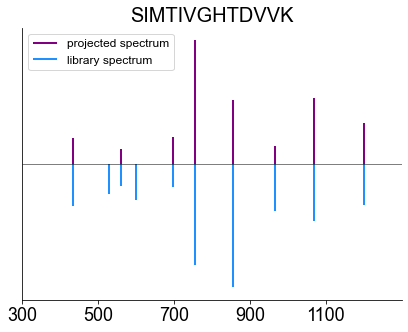

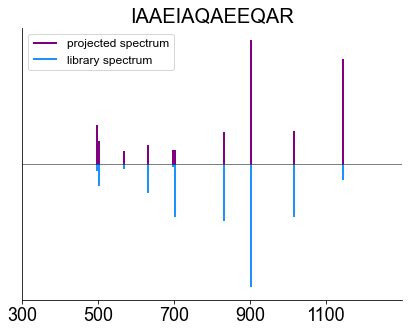

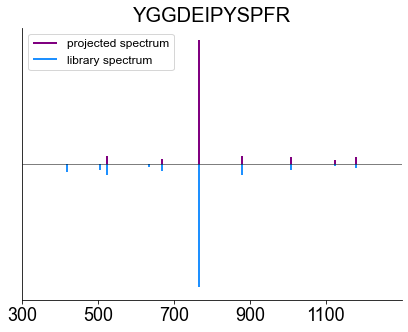

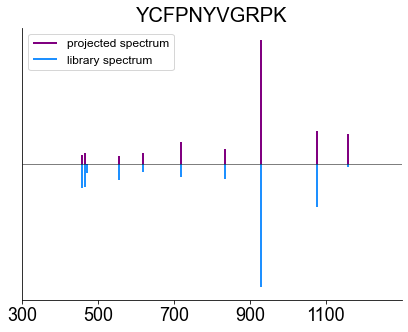

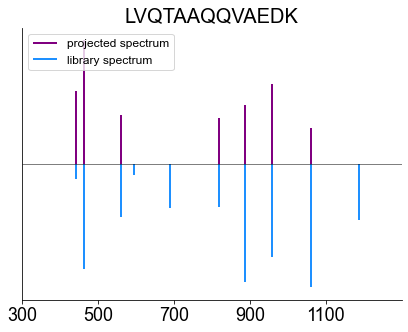

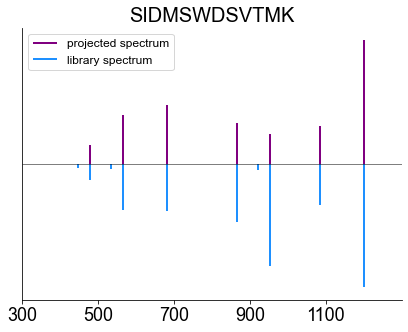

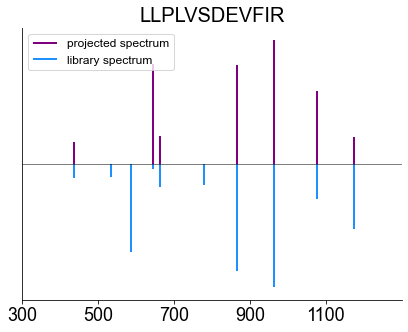

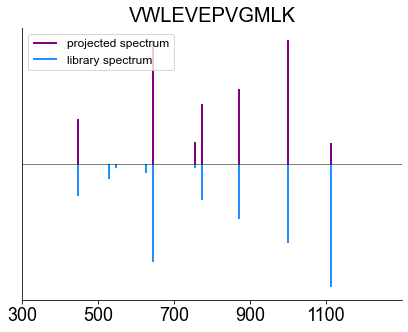

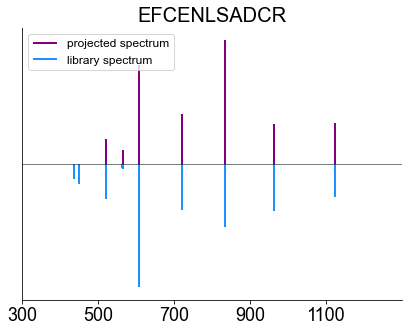

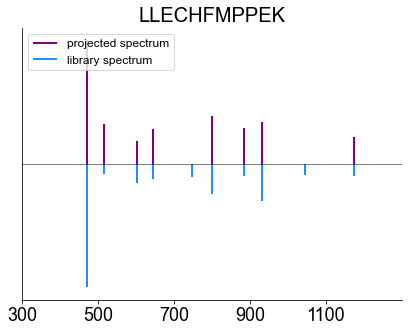

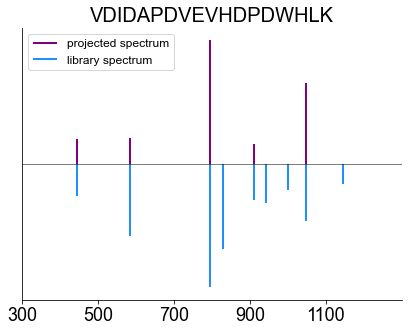

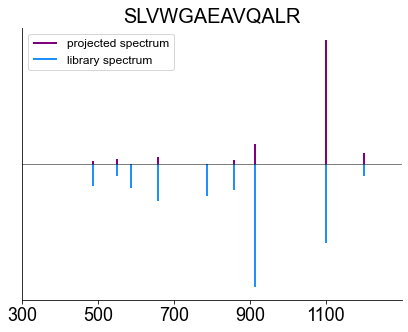

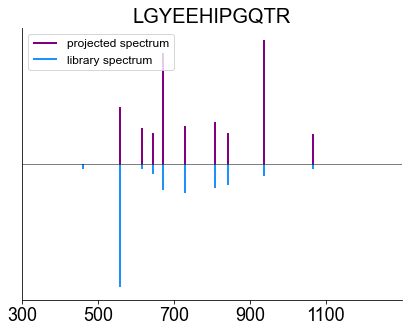

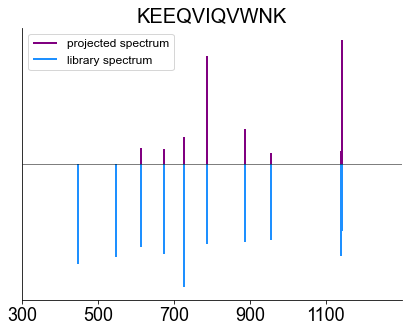

In [34]:
for i in range(0,36):
    plot_fscan(number=i)



In [121]:

fff=[]
for i in range(0,36):
    f=np.array(intensities[i])/max(intensities[i])
    ff=k.tolist()
    fff.append(kk)
fff

[[1.0,
  0.21622,
  0.14945999999999998,
  0.12423,
  0.09319,
  0.08922999999999999,
  0.04938,
  0.02818,
  0.026719999999999997,
  0.025689999999999998],
 [1.0,
  0.7604556228601527,
  0.6745588622596788,
  0.45208058993942585,
  0.39059784040031603,
  0.3019489070318673,
  0.23215696602580985,
  0.15657097708717407,
  0.14483803002370294,
  0.13862259678693706],
 [1.0,
  0.59127,
  0.406,
  0.25393000000000004,
  0.24197,
  0.17811,
  0.14385,
  0.12967,
  0.06232000000000001,
  0.03224],
 [1.0,
  0.5678,
  0.54401,
  0.48257,
  0.47591999999999995,
  0.37226,
  0.16863,
  0.07881,
  0.04813,
  0.03628],
 [1.0,
  0.79991,
  0.63575,
  0.583,
  0.47215,
  0.32092,
  0.0664,
  0.0661,
  0.055220000000000005,
  0.049510000000000005],
 [1.0,
  0.2758454880589838,
  0.17951594806860074,
  0.15843885238018912,
  0.15571405673986216,
  0.13904471870492066,
  0.1320724475076134,
  0.12093284180157077,
  0.09544798845968905,
  0.09200192338515788],
 [1.0,
  0.7417070526012968,
  0.421695545

In [118]:
peplist

[[1044.5320145059998,
  522.7696455029999,
  1143.6004284239998,
  947.4792506519998,
  860.447222242,
  674.3831654219998,
  403.22995924,
  587.351137012,
  516.314023222,
  572.3038524619999],
 [630.356950674,
  743.4410146559999,
  880.49992653,
  1009.542519624,
  440.753601515,
  658.283117018,
  529.3092722,
  561.8169300529999,
  771.367181,
  643.3485943219999],
 [1029.536371604,
  1100.5734853939998,
  817.4566647199999,
  534.2670730299999,
  647.351137012,
  515.2718240519999,
  932.48360775,
  550.7903809469999,
  760.4352009939998,
  468.260531086],
 [516.277637714,
  603.3096661239999,
  924.442136862,
  1039.469079892,
  1186.53749381,
  750.3780800419999,
  419.208692476,
  477.234375904,
  564.2664043139999,
  520.2381781959999],
 [1199.576521854,
  579.3136888639999,
  939.493444152,
  1068.536037246,
  508.276575074,
  825.4505167,
  461.206446594,
  470.250360326,
  600.291899177,
  722.317787964],
 [642.8853439709999,
  1041.59388648,
  886.5356433219999,
  773.45

In [123]:
df_peplist=pd.DataFrame(peplist)

In [124]:
df_peplist

,0,1,2,3,4,5,6,7,8,9
0,1044.532015,522.769646,1143.600428,947.479251,860.447222,674.383165,403.229959,587.351137,516.314023,572.303852
1,630.356951,743.441015,880.499927,1009.542520,440.753602,658.283117,529.309272,561.816930,771.367181,643.348594
2,1029.536372,1100.573485,817.456665,534.267073,647.351137,515.271824,932.483608,550.790381,760.435201,468.260531
3,516.277638,603.309666,924.442137,1039.469080,1186.537494,750.378080,419.208692,477.234376,564.266404,520.238178
4,1199.576522,579.313689,939.493444,1068.536037,508.276575,825.450517,461.206447,470.250360,600.291899,722.317788
5,642.885344,1041.593886,886.535643,773.451579,1128.662300,1015.578236,514.261988,928.509822,672.403901,472.287808
6,900.522301,787.438237,401.141538,504.248646,1056.612179,617.332710,500.298996,999.590715,730.416774,1170.655107
7,731.394733,634.341969,859.453311,726.883333,488.198719,576.817264,678.356951,409.230628,1055.574488,537.289205
8,935.425107,1135.504813,1064.467700,646.334107,848.393078,432.202364,761.361050,545.286428,465.197990,552.230019
9,1005.572757,1076.609871,777.461750,890.545814,1189.693935,607.356222,706.424636,511.251089,444.292894,624.335153


In [22]:
def getlibrary(index):
    pep00=pep_library[pep_library['PeptideSequence'].str.match(peptidelist[index])]
    peptop=pep00.sort_values(by='LibraryIntensity',ascending=False)
    peptop10=peptop.iloc[:10]
    peptides=peptop10['ProductMz'].tolist()
    intensity=np.array(peptop10['LibraryIntensity'].tolist())/max(peptop10['LibraryIntensity'].tolist())
    k=intensity.tolist()
    return(peptides,k)

In [23]:
getlibrary(0)

([1044.5320145059998,
  522.7696455029999,
  1143.6004284239998,
  947.4792506519998,
  860.447222242,
  674.3831654219998,
  403.22995924,
  587.351137012,
  516.314023222,
  572.3038524619999],
 [1.0,
  0.21622,
  0.14945999999999998,
  0.12423,
  0.09319,
  0.08922999999999999,
  0.04938,
  0.02818,
  0.026719999999999997,
  0.025689999999999998])

In [24]:
def changedf2(index=0):
    k=pd.DataFrame(getlibrary(index))
    xx=k.swapaxes("index", "columns")
    xx.columns=['m/z',str(peptidelist[index])]
    return(xx)

 


In [25]:
changedf2(index=0)

,m/z,QQVPSGESAILDR
0,1044.532015,1.00000
1,522.769646,0.21622
2,1143.600428,0.14946
3,947.479251,0.12423
4,860.447222,0.09319
5,674.383165,0.08923
6,403.229959,0.04938
7,587.351137,0.02818
8,516.314023,0.02672
9,572.303852,0.02569


In [26]:
frames3=[]
for i in range(1,36):
    p=changedf2(index=0)
    frames3.append(changedf2(index=i))
    result3 = p.append(frames3)
result3
datadf=result3.fillna(0)
datadf

,m/z,QQVPSGESAILDR,DYLEHITSIGPR,WLAPDGLIFPDR,LTFDSSFSPNTGK,TVMENFVAFVDK,DRIEITSLLPSR,DNNGVIGLLEPMK,TEEQGIPRPLHPPPPPPVQPPQHPR,YTAESSDTLCPR,...,LVQTAAQQVAEDK,SIDMSWDSVTMK,LLPLVSDEVFIR,VWLEVEPVGMLK,EFCENLSADCR,LLECHFMPPEK,VDIDAPDVEVHDPDWHLK,SLVWGAEAVQALR,LGYEEHIPGQTR,KEEQVIQVWNK
0,1044.532015,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,522.769646,0.21622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1143.600428,0.14946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,947.479251,0.12423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,860.447222,0.09319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,614.314417,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676526
6,787.446100,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651624
7,886.514514,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634180
8,954.525473,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618885


In [38]:
datadf1=datadf.sort_values('m/z')
datadf2=datadf1.set_index('m/z')
datadf_lib=datadf2.swapaxes("index", "columns")

datadf_lib

m/z,400.231636,400.716685,401.141538,403.229959,406.211866,409.230628,411.174850,414.271096,416.261594,417.220457,...,1180.563315,1180.563315,1181.565957,1186.537494,1188.585507,1189.693935,1199.507122,1199.576522,1199.645270,1199.653133
QQVPSGESAILDR,0.00000,0.00000,0.000000,0.04938,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
DYLEHITSIGPR,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
WLAPDGLIFPDR,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
LTFDSSFSPNTGK,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.47592,0.00000,0.000000,0.0,0.0,0.00000,0.000000
TVMENFVAFVDK,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,1.0,0.00000,0.000000
DRIEITSLLPSR,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
DNNGVIGLLEPMK,0.00000,0.00000,0.421696,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
TEEQGIPRPLHPPPPPPVQPPQHPR,0.00000,0.00000,0.000000,0.00000,0.000000,0.06235,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
YTAESSDTLCPR,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.000000
PNLADLAVYGVLR,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000,0.00000,0.00000,0.561191,0.0,0.0,0.00000,0.000000


In [46]:
datadf_lib[datadf_lib != 0] = 1 

In [47]:
datadf_lib

m/z,400.231636,400.716685,401.141538,403.229959,406.211866,409.230628,411.174850,414.271096,416.261594,417.220457,...,1180.563315,1180.563315,1181.565957,1186.537494,1188.585507,1189.693935,1199.507122,1199.576522,1199.645270,1199.653133
QQVPSGESAILDR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DYLEHITSIGPR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WLAPDGLIFPDR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LTFDSSFSPNTGK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TVMENFVAFVDK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
DRIEITSLLPSR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNNGVIGLLEPMK,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TEEQGIPRPLHPPPPPPVQPPQHPR,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YTAESSDTLCPR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PNLADLAVYGVLR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
def intenlistheatmap(i=0):
    list_by=peplist[i]
    intensity=[]
    for x in list_by:
        intensity.append(getFragInt(x, mz_list, int_list, TOL, TOL_TYPE))
    kk=np.array(intensity)/max(intensity)
    y=kk.tolist()
    return(list_by,y)

In [30]:
def changedf(index=0):
    kk=pd.DataFrame(intenlistheatmap(i=index))
    xx2=kk.swapaxes("index", "columns")
    xx2.columns=['m/z',str(peptidelist[index])]
    return(xx2)

In [31]:
changedf(index=0)

,m/z,QQVPSGESAILDR
0,1044.532015,1.000000
1,522.769646,0.112900
2,1143.600428,0.154891
3,947.479251,0.098333
4,860.447222,0.101101
5,674.383165,0.018490
6,403.229959,0.032918
7,587.351137,0.021353
8,516.314023,0.035594
9,572.303852,0.015935


In [32]:

frames2=[]
for i in range(1,36):
    p=changedf(index=0)
    frames2.append(changedf(index=i))
    result2 = p.append(frames2)
result2
data=result2.fillna(0)
data

,m/z,QQVPSGESAILDR,DYLEHITSIGPR,WLAPDGLIFPDR,LTFDSSFSPNTGK,TVMENFVAFVDK,DRIEITSLLPSR,DNNGVIGLLEPMK,TEEQGIPRPLHPPPPPPVQPPQHPR,YTAESSDTLCPR,...,LVQTAAQQVAEDK,SIDMSWDSVTMK,LLPLVSDEVFIR,VWLEVEPVGMLK,EFCENLSADCR,LLECHFMPPEK,VDIDAPDVEVHDPDWHLK,SLVWGAEAVQALR,LGYEEHIPGQTR,KEEQVIQVWNK
0,1044.532015,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,522.769646,0.112900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1143.600428,0.154891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,947.479251,0.098333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,860.447222,0.101101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,614.314417,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125546
6,787.446100,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.871687
7,886.514514,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281871
8,954.525473,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085260


In [33]:
data1=data.sort_values('m/z')
data2=data1.set_index('m/z')

In [37]:
data2

data_pro=data2.swapaxes("index", "columns")
data_pro

m/z,400.231636,400.716685,401.141538,403.229959,406.211866,409.230628,411.174850,414.271096,416.261594,417.220457,...,1180.563315,1180.563315,1181.565957,1186.537494,1188.585507,1189.693935,1199.507122,1199.576522,1199.645270,1199.653133
QQVPSGESAILDR,0.000000,0.000000,0.000000,0.032918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
DYLEHITSIGPR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
WLAPDGLIFPDR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
LTFDSSFSPNTGK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.531048,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
TVMENFVAFVDK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.043005,0.000000,0.000000
DRIEITSLLPSR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
DNNGVIGLLEPMK,0.000000,0.000000,0.458282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
TEEQGIPRPLHPPPPPPVQPPQHPR,0.000000,0.000000,0.000000,0.000000,0.000000,0.083351,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
YTAESSDTLCPR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
PNLADLAVYGVLR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.429035,0.0,0.000000,0.000000,0.000000


In [43]:
data_pro[data_pro != 0] = 1 


In [44]:
data_pro

m/z,400.231636,400.716685,401.141538,403.229959,406.211866,409.230628,411.174850,414.271096,416.261594,417.220457,...,1180.563315,1180.563315,1181.565957,1186.537494,1188.585507,1189.693935,1199.507122,1199.576522,1199.645270,1199.653133
QQVPSGESAILDR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DYLEHITSIGPR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WLAPDGLIFPDR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LTFDSSFSPNTGK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TVMENFVAFVDK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
DRIEITSLLPSR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNNGVIGLLEPMK,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TEEQGIPRPLHPPPPPPVQPPQHPR,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YTAESSDTLCPR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PNLADLAVYGVLR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:

import seaborn as sns



<Figure size 4080x3000 with 0 Axes>

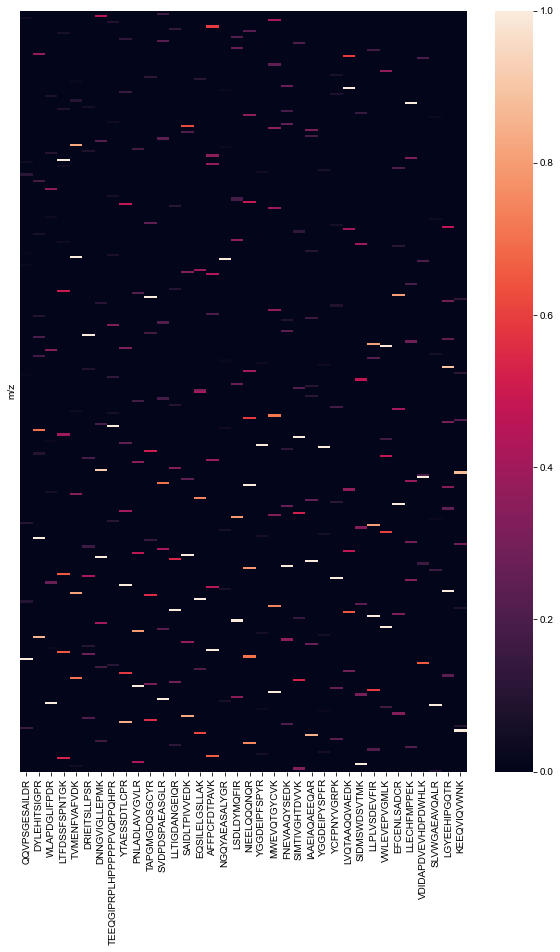

In [68]:
plt.figure(dpi=600)
fig, ax = plt.subplots(figsize=(10,14)) 
sns.heatmap(data2, xticklabels=True, yticklabels=False)

plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\figures\\heatmap1.tiff', dpi=600) 

<Figure size 4080x3000 with 0 Axes>

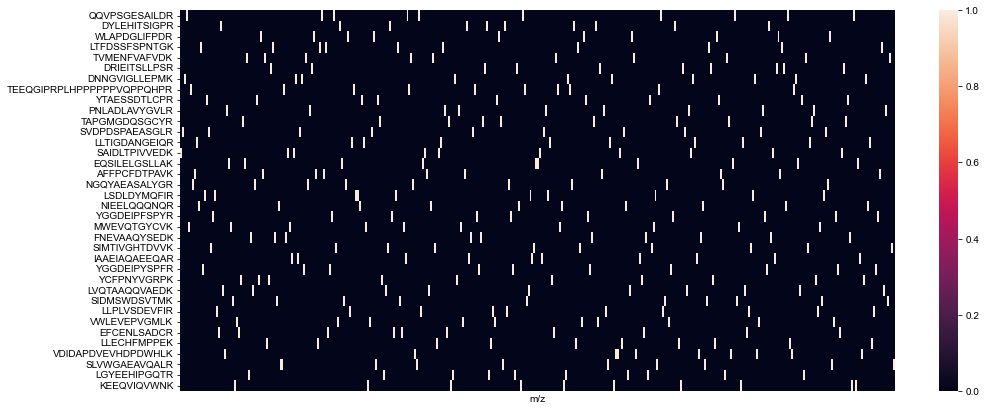

In [45]:
plt.figure(dpi=600)
fig, ax = plt.subplots(figsize=(16,7)) 
sns.heatmap(data_pro, xticklabels=False, yticklabels=True)
plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\figures\\heatmap1.tiff', dpi=600) 

<AxesSubplot:ylabel='m/z'>

<Figure size 4080x3000 with 0 Axes>

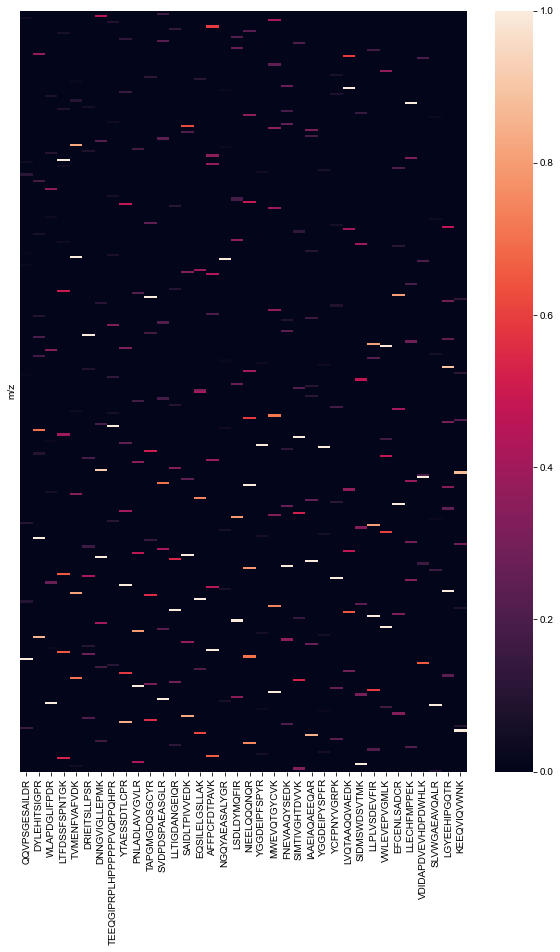

In [66]:
plt.figure(dpi=600)
fig, ax = plt.subplots(figsize=(10,14)) 
sns.heatmap(datadf2, xticklabels=True, yticklabels=False)

<Figure size 4080x3000 with 0 Axes>

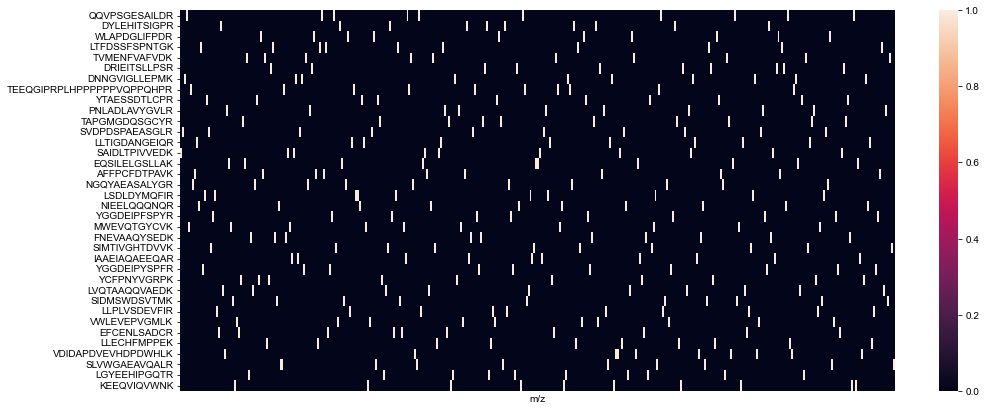

In [48]:
plt.figure(dpi=600)
fig, ax = plt.subplots(figsize=(16,7)) 
sns.heatmap(datadf_lib, xticklabels=False, yticklabels=True)
plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\figures\\heatmap2.tiff', dpi=600) 